In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import time

In [2]:
from geopandas import GeoDataFrame
shape_path="./Data/CT_Shape/ct_shape.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index=ct_shape.BoroCT2010

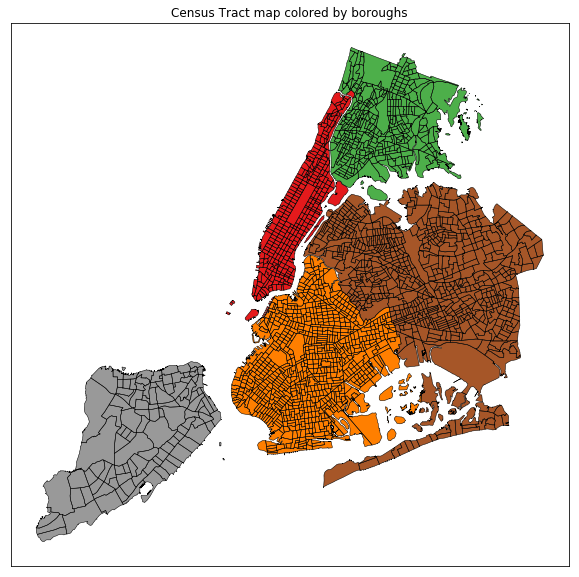

In [3]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape.plot(column='BoroCode',alpha=1,linewidth=0.5,ax=ax)
plt.title("Census Tract map colored by boroughs")

In [4]:
boro = ct_shape['geometry']

In [5]:
# get all the census tract center coordinate 
ct_shape.head()
ct_shape[["BoroCT2010", "geometry"]]
a = ct_shape["geometry"].iloc[0]
#print(ct_shape["geometry"].iloc[0].)
center_x = ct_shape.apply(lambda row: row["geometry"].centroid.x,1) 
center_y = ct_shape.apply(lambda row: row["geometry"].centroid.y,1) 
new_df = pd.DataFrame({"boro":ct_shape["BoroCT2010"], "center_x":center_x, "center_y":center_y})
#new_df.to_csv("./data/boro.csv")

In [6]:
new_df.head(3)

,boro,center_x,center_y
BoroCT2010,,,
5000900,5000900,-74.082856,40.642204
5012500,5012500,-74.118852,40.628685
5013301,5013301,-74.118916,40.635597


### prepare crime count for each census tract

In [7]:
#boro_count = pd.read_csv("./data/Bloomberg1.csv")
boro_count = pd.read_csv("./data/Bloomberg2.csv")
#boro_count = pd.read_csv("./data/Blasio.csv")

In [8]:
reset_ct_shape = ct_shape.drop(["BoroCT2010"],axis=1).reset_index()
reset_ct_shape["BoroCT2010"] = reset_ct_shape["BoroCT2010"].astype(int)
ct_shape_boro = pd.merge(left=reset_ct_shape, right=boro_count, on="BoroCT2010", how="left")

In [9]:
ct_shape_boro["count"] = ct_shape_boro["count"]/4.0
#threshold = sorted(plot_df["count"])[-200]
threshold = 900

In [10]:
plot_df = ct_shape_boro.copy()
plot_df["count"] = plot_df.apply(lambda x: np.minimum(x["count"], threshold),1)
plot_df.fillna(0,inplace=True)

/Users/Sean/anaconda/lib/python3.6/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


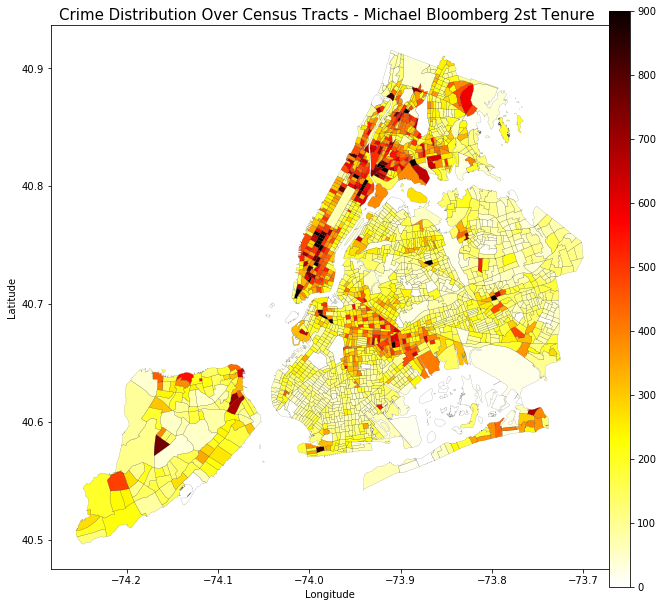

In [11]:
f, ax = plt.subplots(figsize=(10,10))
plot_df.plot(column='count',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Crime Distribution Over Census Tracts - Michael Bloomberg 2st Tenure ", fontsize=15)
#plt.title("Crime Distribution Over Census Tracts - Bill de Blasio Tenure ", fontsize=15)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# add colorbar
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='hot_r', norm=plt.Normalize(vmin=0, vmax=threshold))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
fig.colorbar(sm, cax=cax)

# save plot
#savefig('./figures/Bill_de_Blasio.png')